In [1]:
import matplotlib.pyplot as plt
import sys
from matplotlib.gridspec import GridSpec

sys.path.append('../FSLE')
from FSLE_functions import *

In /home/tra198/anaconda3/envs/lagrangian/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tra198/anaconda3/envs/lagrangian/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tra198/anaconda3/envs/lagrangian/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/tra198/anaconda3/envs/lagrangian/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases lat

### FSLE from BRAN renalysis, for 4 depth layers

In [2]:
# Define the range of depths or layers you want to compute FSLE for.
depths = [10, 500, 1000, 2000]  # Modify this as needed.
domain = [140,160,-60,-50]

# Set parameters for FSLE computation.
temp_dir = '_tmp/'
t0, t1 = pd.Timestamp('2023-06-15'), pd.Timestamp('2023-06-22 12:00')
resolution = 0.02
final_separation = 0.1

# BRAN dataset
input_file = '../data/BRAN2020_uv_2023_06.nc'
ds = xr.open_dataset(input_file)
BRAN = ds.assign(longitude=ds.x[0], latitude=ds.y[:, 0], depth=-ds.z)
variables = {'time': 'time', 'longitude': 'longitude', 'latitude': 'latitude', 'u': 'u', 'v': 'v', 'depth':'depth'}

fsle_3d = compute_FSLE_3D(BRAN, variables, t0, t1, domain, depths, resolution, final_separation, temp_dir)


map_of_fle _tmp/list.ini FSLE_depth_10.nc         20230622 --advection_time 6 --resolution 0.02         --x_min 140.0 --x_max 160.0 --y_min -60.0 --y_max -50.0         --final_separation 0.1 --time_direction backward
map_of_fle _tmp/list.ini FSLE_depth_500.nc         20230622 --advection_time 6 --resolution 0.02         --x_min 140.0 --x_max 160.0 --y_min -60.0 --y_max -50.0         --final_separation 0.1 --time_direction backward
map_of_fle _tmp/list.ini FSLE_depth_1000.nc         20230622 --advection_time 6 --resolution 0.02         --x_min 140.0 --x_max 160.0 --y_min -60.0 --y_max -50.0         --final_separation 0.1 --time_direction backward
map_of_fle _tmp/list.ini FSLE_depth_2000.nc         20230622 --advection_time 6 --resolution 0.02         --x_min 140.0 --x_max 160.0 --y_min -60.0 --y_max -50.0         --final_separation 0.1 --time_direction backward


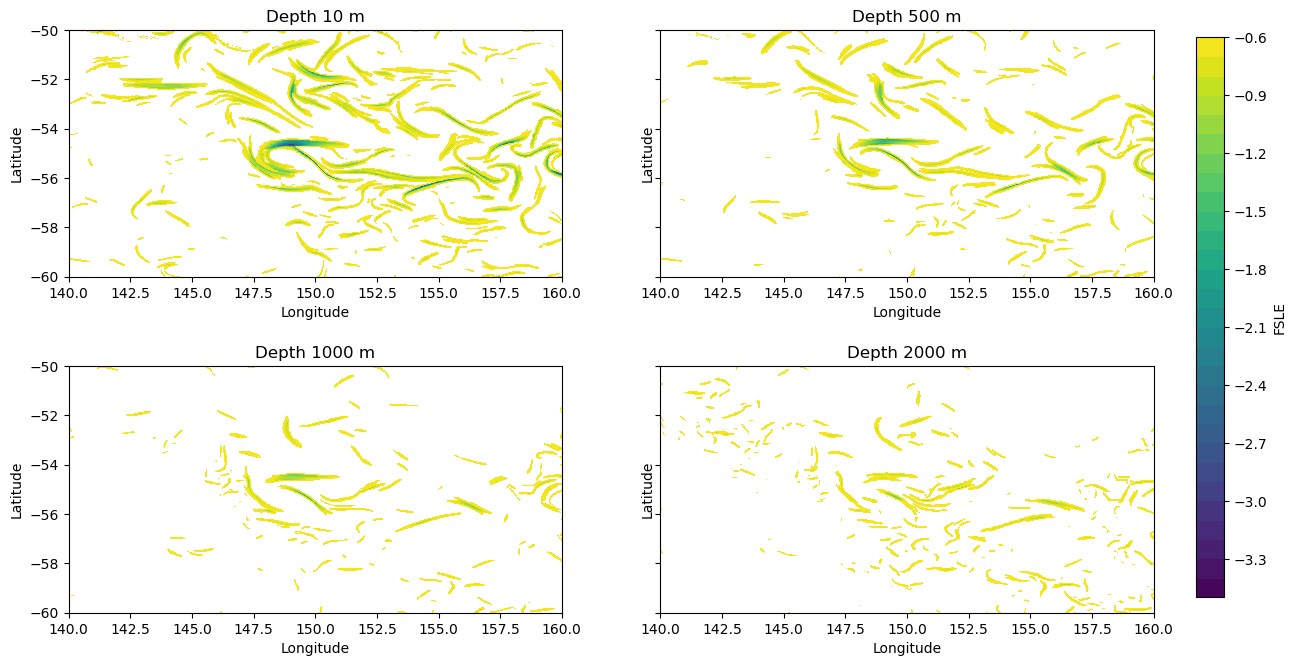

In [4]:
# Define the range of depths to visualize.
depths = fsle_3d['depth'].values

# Create a figure with subplots for each depth level.
fig, axes = plt.subplots(2, int(len(depths)/2), figsize=(14, 8), sharey=True)
axes = axes.flatten()

for i, depth in enumerate(depths):
    ax = axes[i]
    fsle = fsle_3d['lambda1'].sel(depth=depth)
    im = ax.contourf(fsle.lon, fsle.lat, fsle.T, levels=np.arange(-3.5,-0.5,0.1), cmap='viridis')
    ax.set_title(f'Depth {depth} m')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_aspect('equal')

cax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('FSLE')

### FSLE from BRAN renalysis, for all depth layers

In [3]:
# Define the range of depths or layers you want to compute FSLE for.
depths = [10, 500, 1000, 2000]  # Modify this as needed.

# Set parameters for FSLE computation.
temp_dir = '_tmp/'
t0, t1 = pd.Timestamp('2023-06-15'), pd.Timestamp('2023-06-22 12:00')
resolution = 0.02
final_separation = 0.1

# BRAN dataset
input_file = '../data/BRAN2020_uv_2023_06.nc'
ds = xr.open_dataset(input_file)
BRAN = ds.assign(longitude=ds.x[0], latitude=ds.y[:, 0], depth=-ds.z)
variables = {'time': 'time', 'longitude': 'longitude', 'latitude': 'latitude', 'u': 'u', 'v': 'v', 'depth':'depth'}

fsle_3d_full = compute_FSLE_3D(BRAN, variables, t0, t1, domain, None, resolution, final_separation, temp_dir)

map_of_fle _tmp/list.ini FSLE_depth_4509.18017578125.nc         20230622 --advection_time 6 --resolution 0.02         --x_min 140.0 --x_max 160.0 --y_min -60.0 --y_max -50.0         --final_separation 0.1 --time_direction backward
map_of_fle _tmp/list.ini FSLE_depth_3603.10107421875.nc         20230622 --advection_time 6 --resolution 0.02         --x_min 140.0 --x_max 160.0 --y_min -60.0 --y_max -50.0         --final_separation 0.1 --time_direction backward
map_of_fle _tmp/list.ini FSLE_depth_2894.841796875.nc         20230622 --advection_time 6 --resolution 0.02         --x_min 140.0 --x_max 160.0 --y_min -60.0 --y_max -50.0         --final_separation 0.1 --time_direction backward
map_of_fle _tmp/list.ini FSLE_depth_2431.10107421875.nc         20230622 --advection_time 6 --resolution 0.02         --x_min 140.0 --x_max 160.0 --y_min -60.0 --y_max -50.0         --final_separation 0.1 --time_direction backward
map_of_fle _tmp/list.ini FSLE_depth_2165.18017578125.nc         20230622 --adv

map_of_fle _tmp/list.ini FSLE_depth_105.0.nc         20230622 --advection_time 6 --resolution 0.02         --x_min 140.0 --x_max 160.0 --y_min -60.0 --y_max -50.0         --final_separation 0.1 --time_direction backward
map_of_fle _tmp/list.ini FSLE_depth_95.0.nc         20230622 --advection_time 6 --resolution 0.02         --x_min 140.0 --x_max 160.0 --y_min -60.0 --y_max -50.0         --final_separation 0.1 --time_direction backward
map_of_fle _tmp/list.ini FSLE_depth_85.01538848876953.nc         20230622 --advection_time 6 --resolution 0.02         --x_min 140.0 --x_max 160.0 --y_min -60.0 --y_max -50.0         --final_separation 0.1 --time_direction backward
map_of_fle _tmp/list.ini FSLE_depth_75.16702270507812.nc         20230622 --advection_time 6 --resolution 0.02         --x_min 140.0 --x_max 160.0 --y_min -60.0 --y_max -50.0         --final_separation 0.1 --time_direction backward
map_of_fle _tmp/list.ini FSLE_depth_65.66938018798828.nc         20230622 --advection_time 6 --re

/home/tra198/anaconda3/envs/lagrangian/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if sys.path[0] == "":


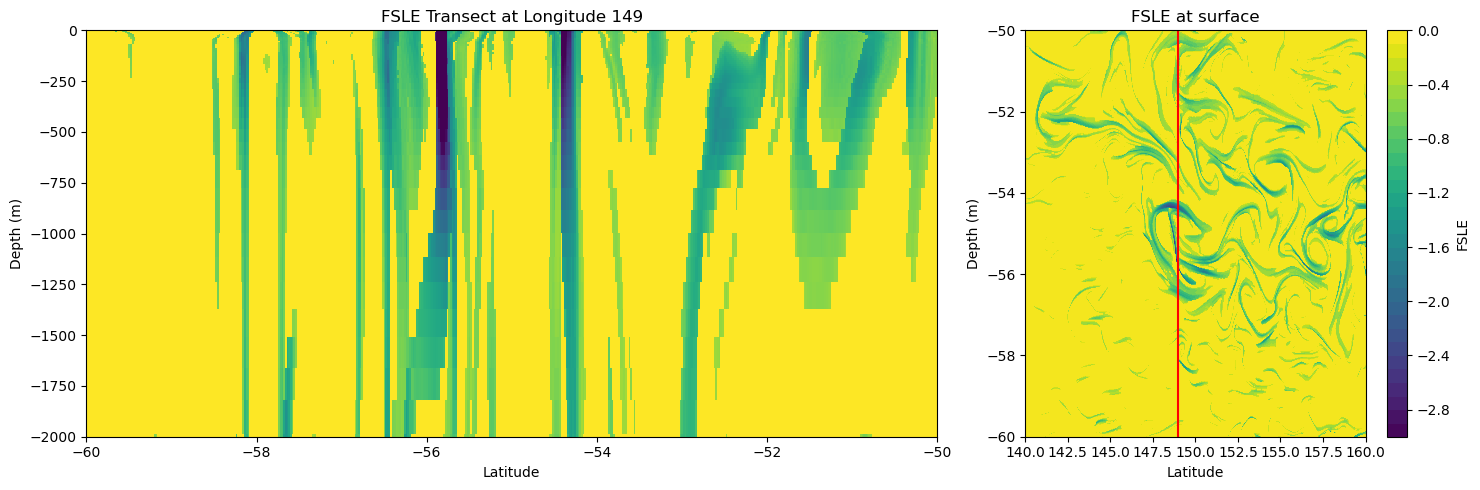

In [8]:
# Extract the longitudinal transect at a specific longitude.
longitude = 149
fsle_transect = fsle_3d_full.sel(lon=longitude, method='nearest')

# Create a figure with a 1x2 grid
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(1, 2, width_ratios=[2, 1])

# Subplot 1: Transect
ax = plt.subplot(gs[0])
# im = ax.contourf(fsle_transect.lat, -fsle_transect['depth'], fsle_transect['lambda1'], levels=np.arange(-3, 0.1, 0.1), cmap='viridis')
im = ax.pcolormesh(fsle_transect.lat, -fsle_transect['depth'], fsle_transect['lambda1'], cmap='viridis')
im.set_clim(-2, 0)
ax.set_xlabel('Latitude')
ax.set_ylabel('Depth (m)')
ax.set_title(f'FSLE Transect at Longitude {longitude}')
ax.set_ylim(-2000, 0)

# Subplot 2: FSLE at surfacxe
ax = plt.subplot(gs[1])
im = ax.contourf(fsle_3d_full['lon'], fsle_3d_full['lat'], fsle_3d_full['lambda1'].isel(depth = -1).T, cmap='viridis',levels=np.arange(-3, 0.1, 0.1))
ax.set_xlabel('Latitude')
ax.set_ylabel('Depth (m)')
ax.set_title('FSLE at surface')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('FSLE')
plt.axvline(longitude, c = 'r')

plt.tight_layout()